<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [80]:
from bs4 import BeautifulSoup as bs
import requests

##### Your Code Here #####
df = pd.read_csv("data/job_listings.csv")
df = df[['description', 'title']]

# Turn columns into new string type and filter by substring
df['description'] = df['description'].astype("string")
df['title'] = df['title'].astype("string")
df = df[df['title'].str.lower().str.strip().str.contains("data scientist")]

In [81]:
def clean_html(html):
    text = bs(html)
    strings = [re.sub("\\\\.|[^a-zA-Z\"',./ ]+", '', string)
     for string in text.stripped_strings
     if re.sub("\\\\.|[^a-zA-Z\"',./ ]+", '', string)]
    
    return " ".join(strings[2:])
    
    

In [86]:
df['description'] = df['description'].map(clean_html)

## 2) Use Spacy to tokenize the listings 

In [83]:
##### Your Code Here #####
nlp = spacy.load("en_core_web_lg")

In [84]:
tokenizer = nlp.Defaults.create_tokenizer(nlp)

In [93]:
tokens = []
for doc in tokenizer.pipe(df['description']):
    doc_tokens = [
        token.lemma_
        for token in doc
        if token.is_stop == False
        and token.is_punct == False
        and token.text != " "
    ]
    tokens.append(doc_tokens)
    
df['tokens']= tokens
df['tokens'].head()

0    [Conceptual, understand, Machine, Learning, mo...
1    [Data, Scientist, help, build, machine, learn,...
2    [Ability, statistical, model, build, predictiv...
3    [Contract, general, supervision, Professors, D...
4    [year, Analytics, experience, Understand, busi...
Name: tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [178]:
def sklearn_tokenizer(text):
    stopwords = spacy.lang.en.stop_words.STOP_WORDS.union({'datum'})    
    tokens = tokenizer(text)
    doc_tokens = [
        token.lemma_
        for token in tokens
        if token.lemma_ not in stopwords
        and token.is_punct == False
        and token.lemma_ != " "
        ]
    return doc_tokens

In [179]:
sklearn_tokenizer(df['description'][0])

['Conceptual',
 'understand',
 'Machine',
 'Learning',
 'model',
 'like',
 'Naicxave',
 'Bayes',
 'KMeans',
 'SVM',
 'Apriori',
 'Linear/',
 'Logistic',
 'Regression',
 'Neural',
 'Random',
 'Forests',
 'Decision',
 'Trees',
 'KNN',
 'handson',
 'experience',
 'little',
 'Intermediate',
 'expert',
 'level',
 'code',
 'skill',
 'Python',
 'R.',
 'Ability',
 'write',
 'function',
 'clean',
 'efficient',
 'manipulation',
 'mandatory',
 'role',
 'Exposure',
 'package',
 'like',
 'NumPy',
 'SciPy',
 'Pandas',
 'Matplotlib',
 'etc',
 'Python',
 'GGPlot',
 'dplyr',
 'tidyR',
 'R',
 'Ability',
 'communicate',
 'Model',
 'finding',
 'Technical',
 'NonTechnical',
 'stake',
 'holder',
 'Hands',
 'experience',
 'SQL',
 'Hive',
 'similar',
 'programme',
 'language',
 'Must',
 'past',
 'work',
 'GitHub',
 'Kaggle',
 'publish',
 'article',
 'Master',
 'degree',
 'Statistics',
 'Mathematics',
 'Computer',
 'Science',
 'quant',
 'specific',
 'field',
 'Apply',
 'Now']

In [180]:
##### Your Code Here #####
vect = CountVectorizer(tokenizer=sklearn_tokenizer)
dtm = vect.fit_transform(df['description'])
print(dtm)

  (0, 1133)	1
  (0, 6134)	1
  (0, 3526)	1
  (0, 3375)	1
  (0, 3771)	2
  (0, 3431)	2
  (0, 3875)	1
  (0, 527)	1
  (0, 3300)	1
  (0, 5759)	1
  (0, 338)	1
  (0, 3443)	1
  (0, 3474)	1
  (0, 4882)	1
  (0, 3930)	1
  (0, 4776)	1
  (0, 2403)	1
  (0, 1489)	1
  (0, 6033)	1
  (0, 3306)	1
  (0, 2681)	1
  (0, 2117)	2
  (0, 3458)	1
  (0, 3138)	1
  (0, 2125)	1
  :	:
  (405, 2223)	2
  (405, 2137)	1
  (405, 797)	1
  (405, 4222)	1
  (405, 6314)	1
  (405, 1885)	1
  (405, 4916)	1
  (405, 1929)	1
  (405, 6330)	1
  (405, 4878)	1
  (405, 599)	2
  (405, 5327)	1
  (405, 289)	2
  (405, 4064)	1
  (405, 5183)	1
  (405, 2635)	1
  (405, 5043)	1
  (405, 469)	1
  (405, 3547)	1
  (405, 3199)	1
  (405, 840)	5
  (405, 4051)	1
  (405, 2944)	1
  (405, 2371)	1
  (405, 841)	1


In [181]:
dtm_df = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
sums = dtm_df.sum(axis=0).sort_values(ascending=False)

## 4) Visualize the most common word counts

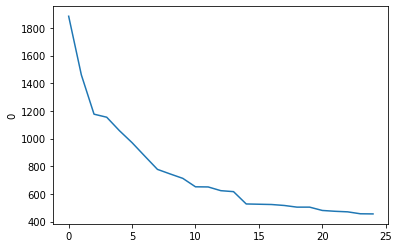

In [182]:
##### Your Code Here #####
plot_sums = sums[:25].reset_index()
import seaborn as sns
sns.lineplot(x=plot_sums.index, y = plot_sums[0])

In [183]:
plot_sums

,index,0
0,experience,1884
1,work,1460
2,model,1176
3,team,1154
4,business,1057
5,learn,970
6,science,873
7,product,777
8,analysis,744
9,use,712


## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 